In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer as si

In [2]:
df = pd.read_csv("data.csv")
df.drop("instance_id", inplace=True, axis=1)
df.drop("track_name", inplace=True, axis=1)
df.head()



,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [3]:
# impute all 0 and -1 values for nan values

df["loudness"].replace(-1, np.nan, inplace=True)
df["energy"].replace(-1, np.nan, inplace=True)
df["popularity"].replace(0, np.nan, inplace=True)
df["duration_ms"].replace(-1, np.nan, inplace=True)
df["instrumentalness"].replace(0, np.nan, inplace=True)
df["mode"].replace("?", np.nan, inplace=True)
df["mode"].replace("Major", 1, inplace=True)
df["mode"].replace("Minor", 0, inplace=True)
df["voice_gender"].replace("Female", 1, inplace=True)
df["voice_gender"].replace("Male", 0, inplace=True)
df["tempo"].replace("?", np.nan, inplace=True)

C:\Users\jackh\AppData\Local\Temp\ipykernel_1148\950208514.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["loudness"].replace(-1, np.nan, inplace=True)
C:\Users\jackh\AppData\Local\Temp\ipykernel_1148\950208514.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [4]:
#impute na values based on genre

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

df["popularity"] = df.groupby("music_genre")["popularity"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["danceability"] = df.groupby("music_genre")["danceability"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["duration_ms"] = df.groupby("music_genre")["duration_ms"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["energy"] = df.groupby("music_genre")["energy"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["instrumentalness"] = df.groupby("music_genre")["instrumentalness"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["mode"] = df.groupby("music_genre")["mode"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["speechiness"] = df.groupby("music_genre")["speechiness"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["loudness"] = df.groupby("music_genre")["loudness"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["valence"] = df.groupby("music_genre")["valence"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())
df["tempo"] = df.groupby("music_genre")["tempo"].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).ravel())

df.dropna(axis=0, subset="voice_gender", inplace=True)

In [5]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence',
       'music_genre'],
      dtype='object')

In [6]:
df.dropna(inplace=True, axis=0, subset="musician_category")
df = pd.get_dummies(df, columns=['voice_gender', 'key', 'musician_category'])


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["music_genre"] = le.fit_transform(df['music_genre'])
df["music_genre"]

1        4
2        5
3        6
4        0
6        5
        ..
15675    0
15676    0
15677    4
15679    6
15680    0
Name: music_genre, Length: 13620, dtype: int32

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit()

TypeError: BaseMixture.fit() missing 1 required positional argument: 'X'

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'music_genre'}>,
        <Axes: title={'center': 'acousticness_gmm'}>, <Axes: >, <Axes: >]],
      dtype=object)

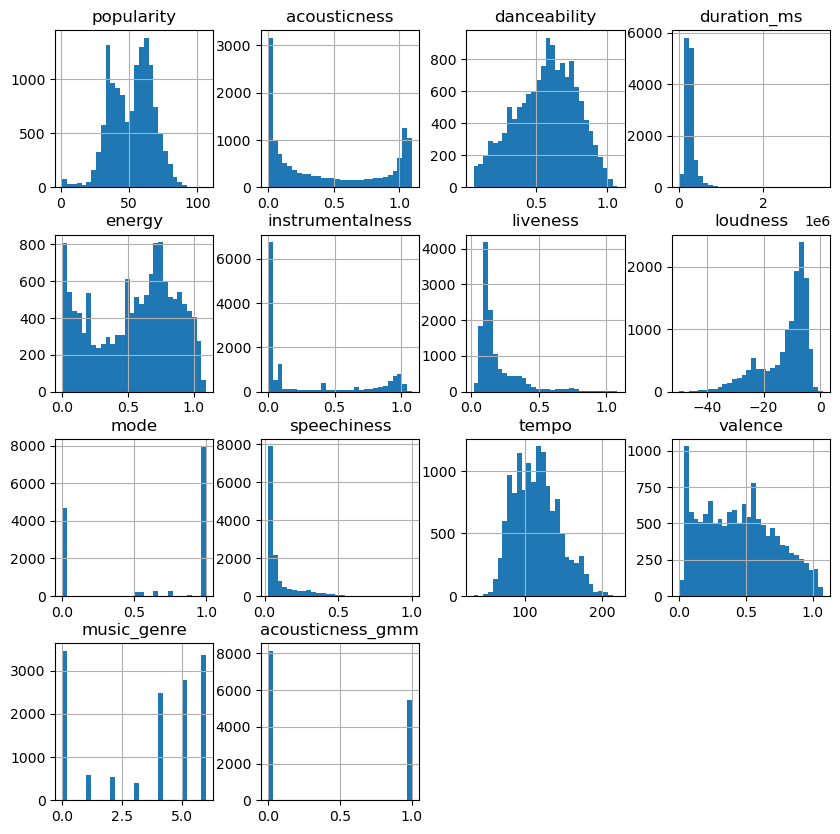

In [9]:
df.hist(bins=30, figsize=(10,10))

In [10]:
df["acousticness_gmm"]

1        1
2        0
3        0
4        1
6        0
        ..
15675    1
15676    1
15677    1
15679    0
15680    1
Name: acousticness_gmm, Length: 13620, dtype: int64

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large da

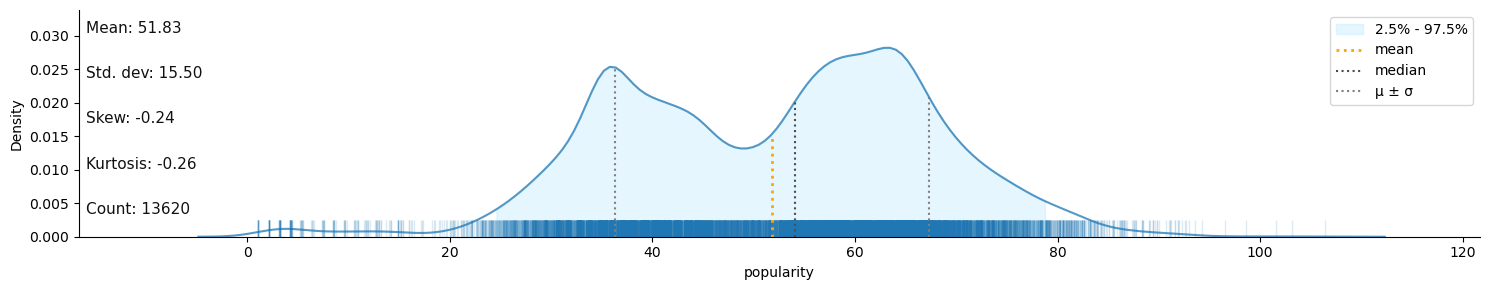

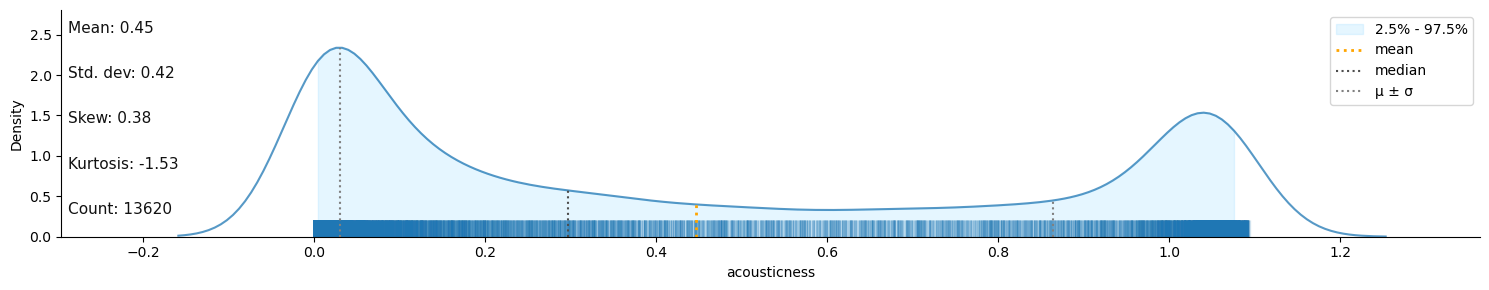

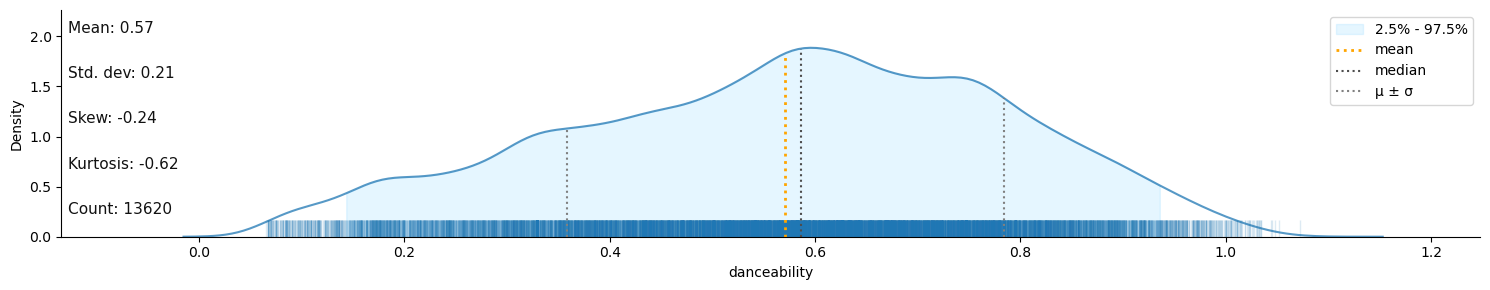

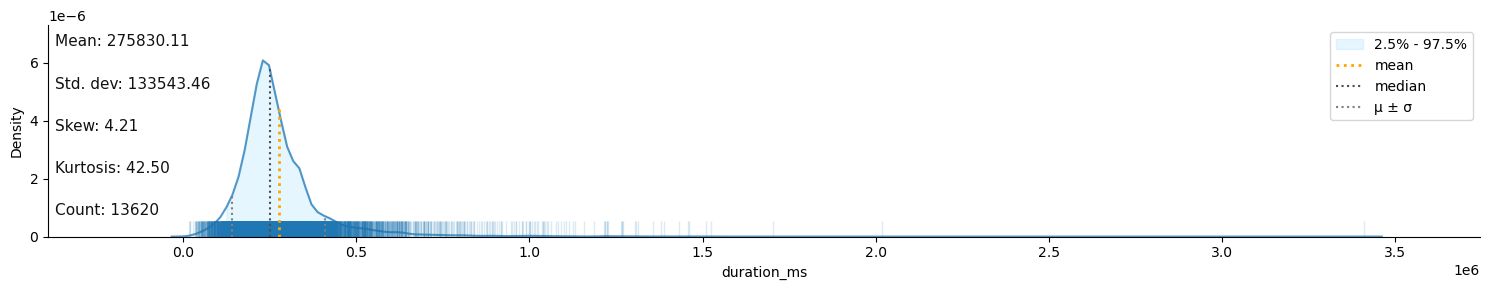

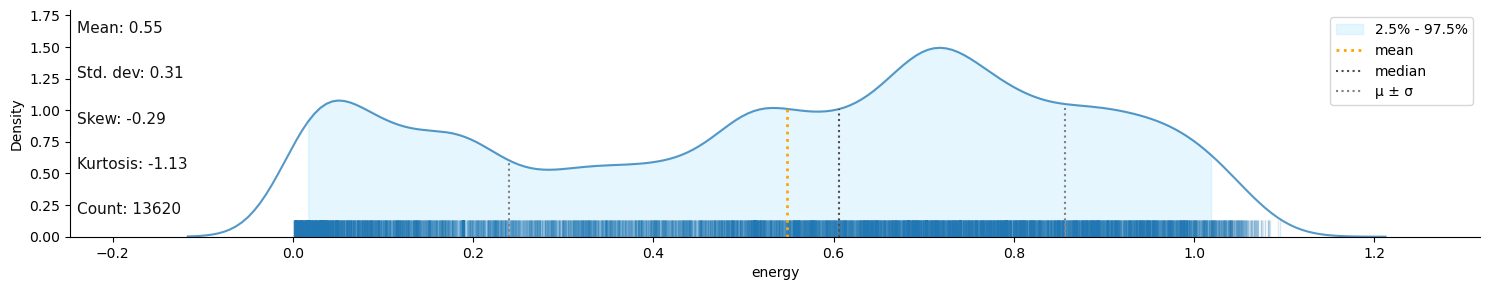

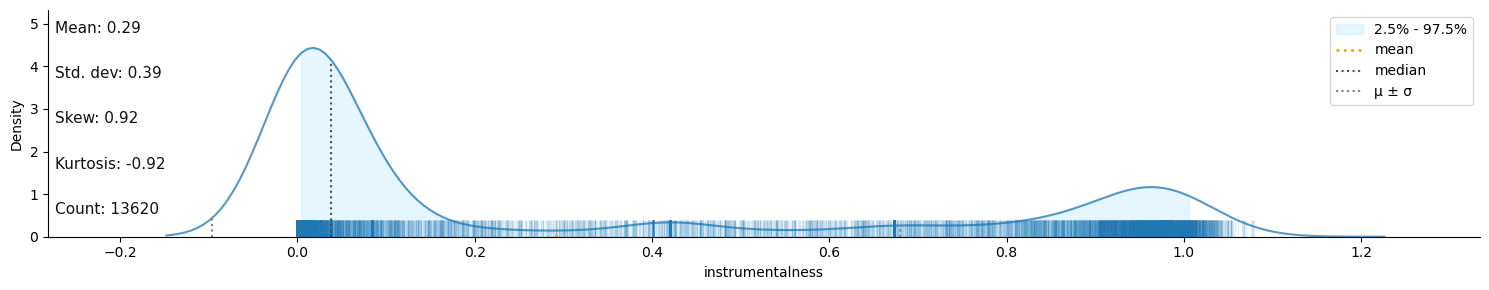

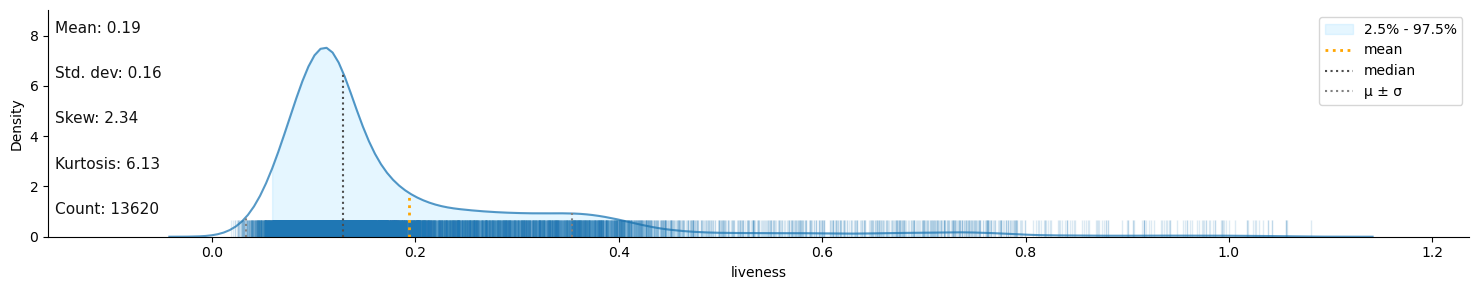

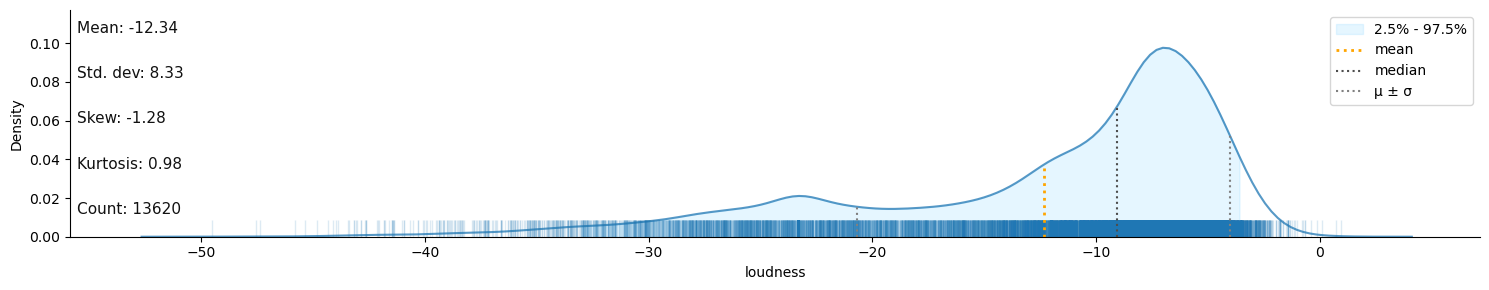

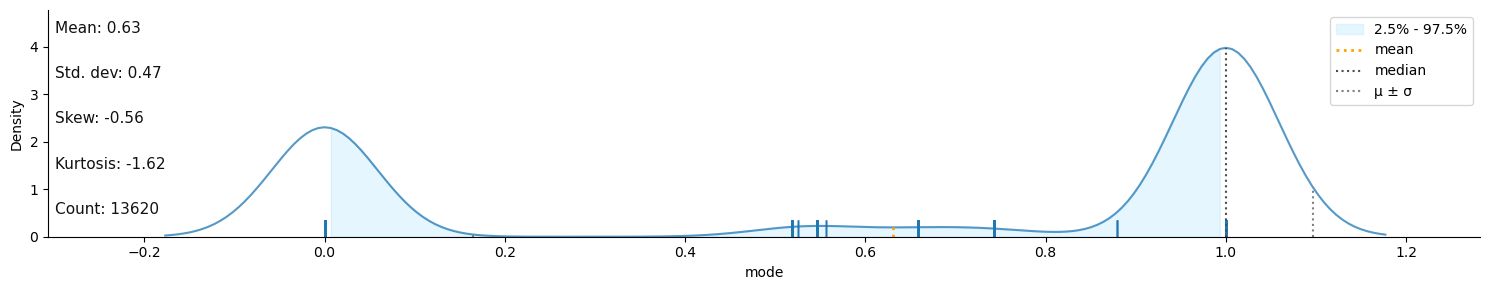

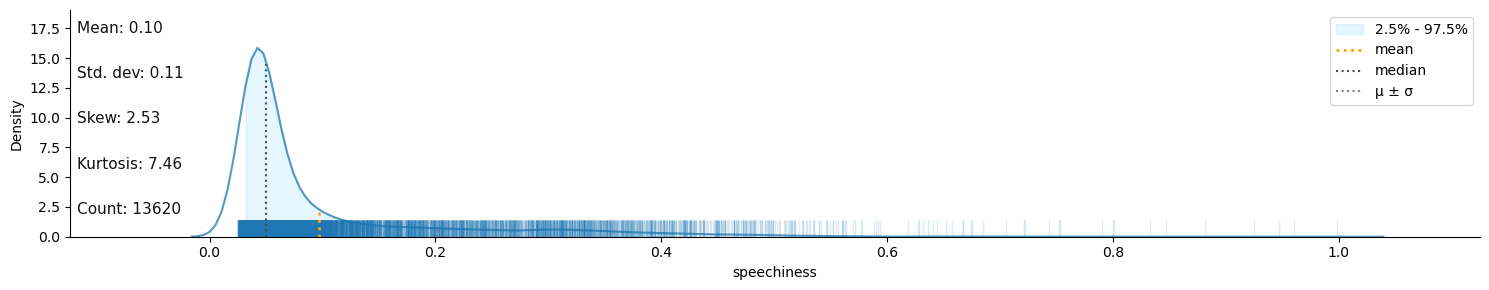

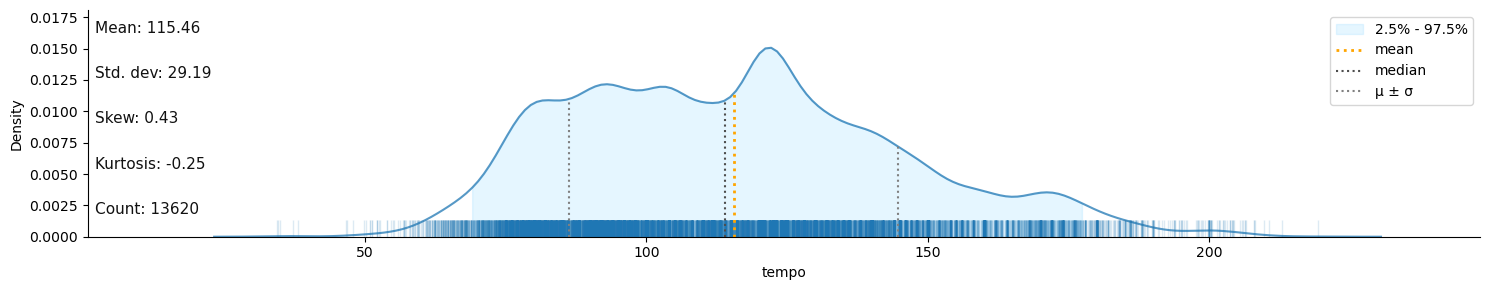

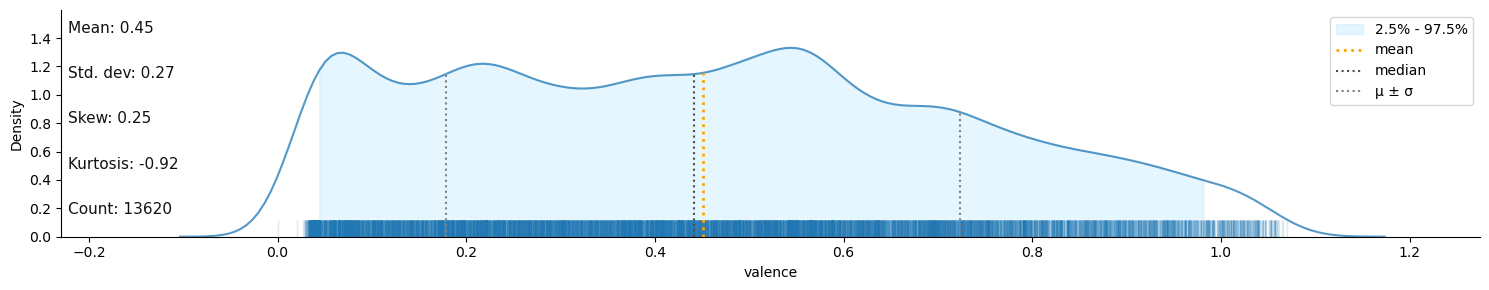

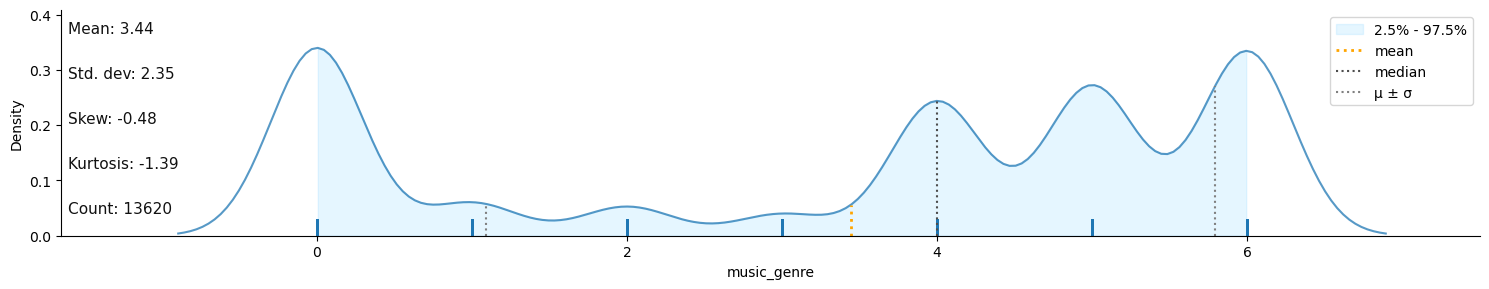

In [9]:
import klib

for column in df.columns:
    klib.dist_plot(df[column])

In [12]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'music_genre', 'voice_gender_0', 'voice_gender_1',
       'voice_gender_Both', 'key_Scale A', 'key_Scale A Sharp', 'key_Scale B',
       'key_Scale C', 'key_Scale C Sharp', 'key_Scale D', 'key_Scale D Sharp',
       'key_Scale E', 'key_Scale F', 'key_Scale F Sharp', 'key_Scale G',
       'key_Scale G Sharp', 'musician_category_Band', 'musician_category_Duet',
       'musician_category_Solo', 'acousticness_gmm'],
      dtype='object')

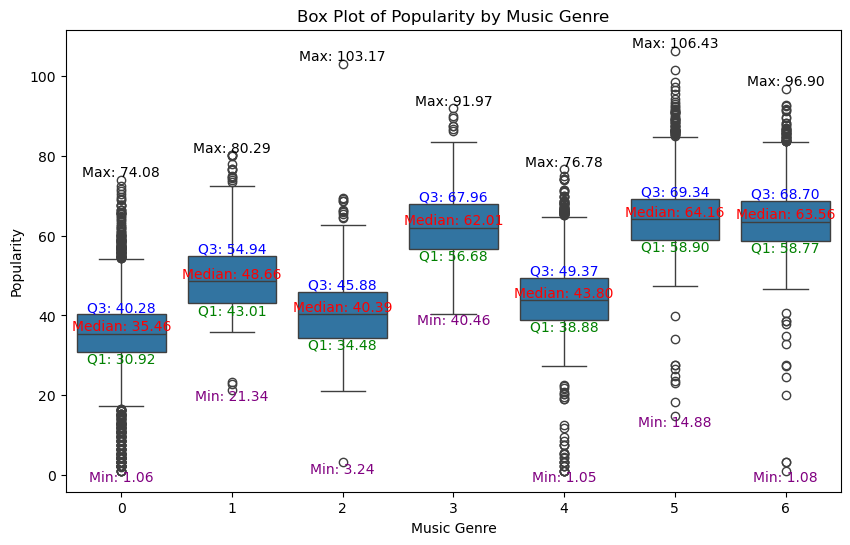

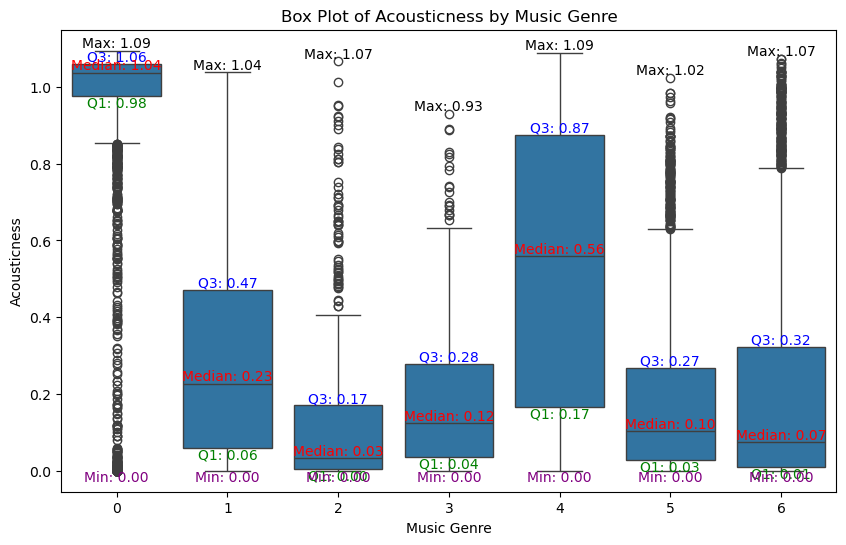

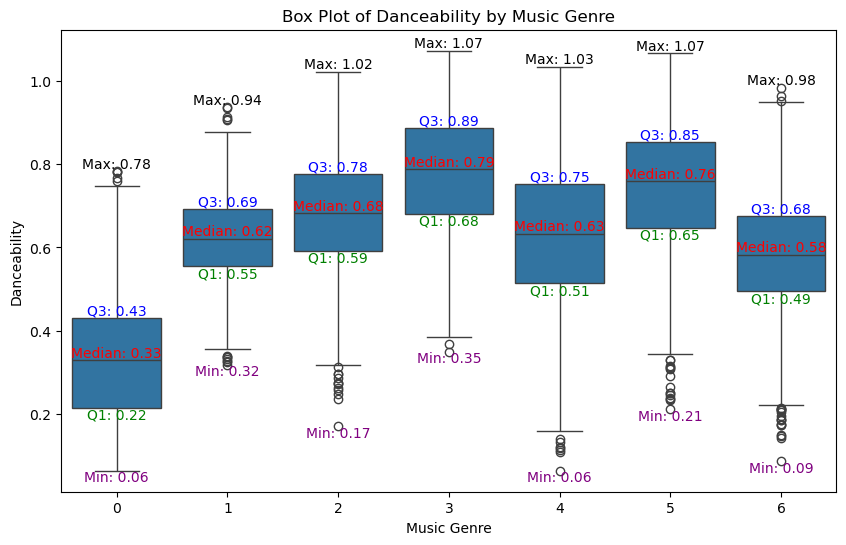

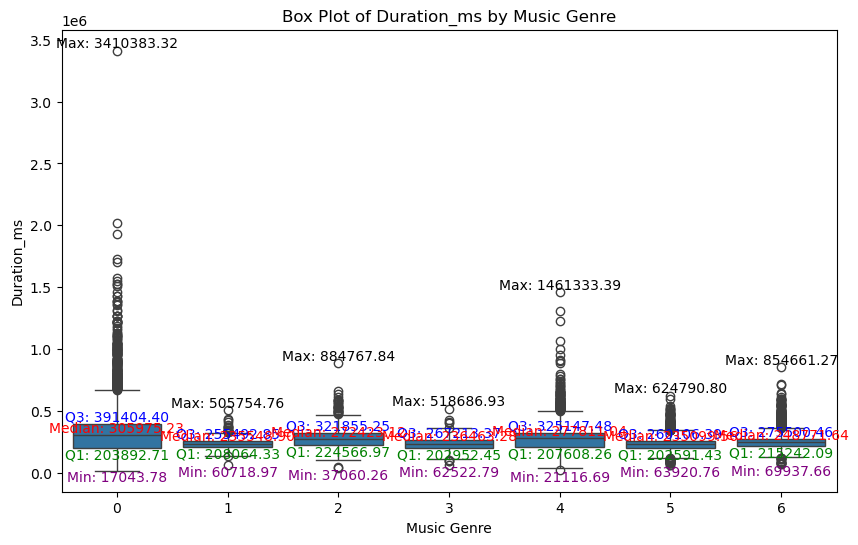

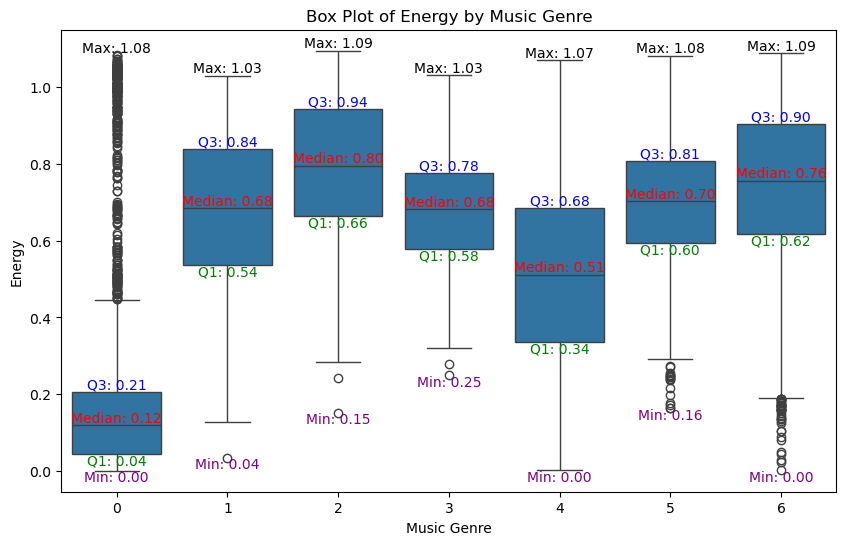

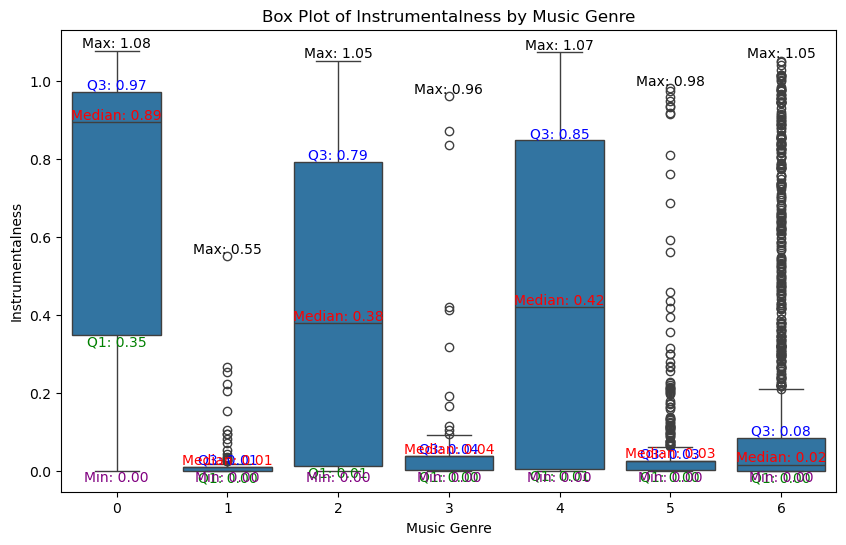

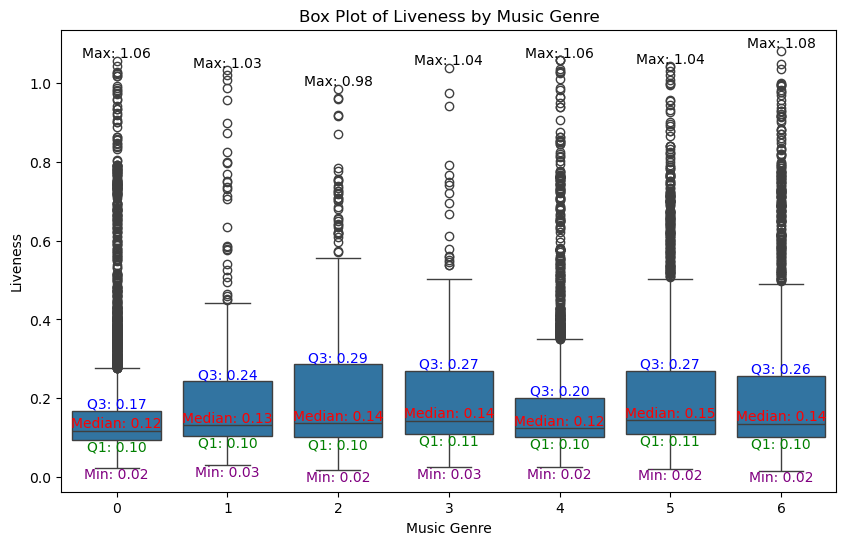

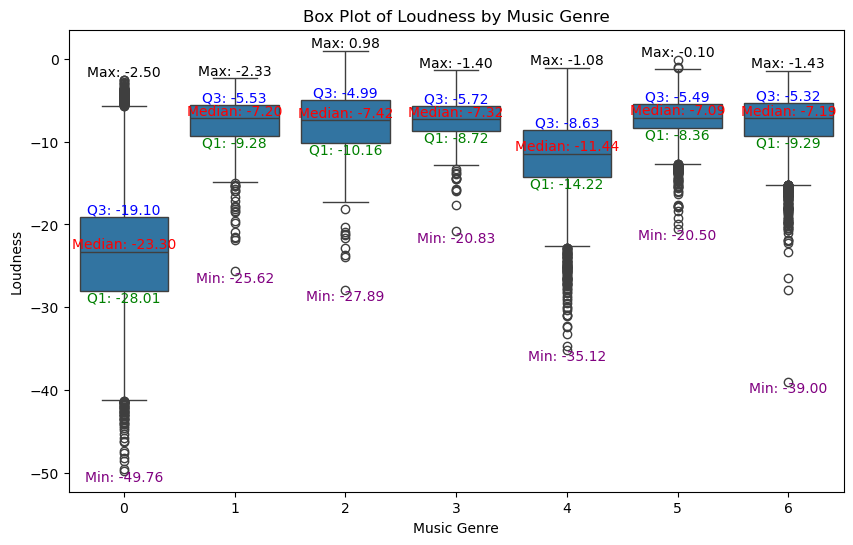

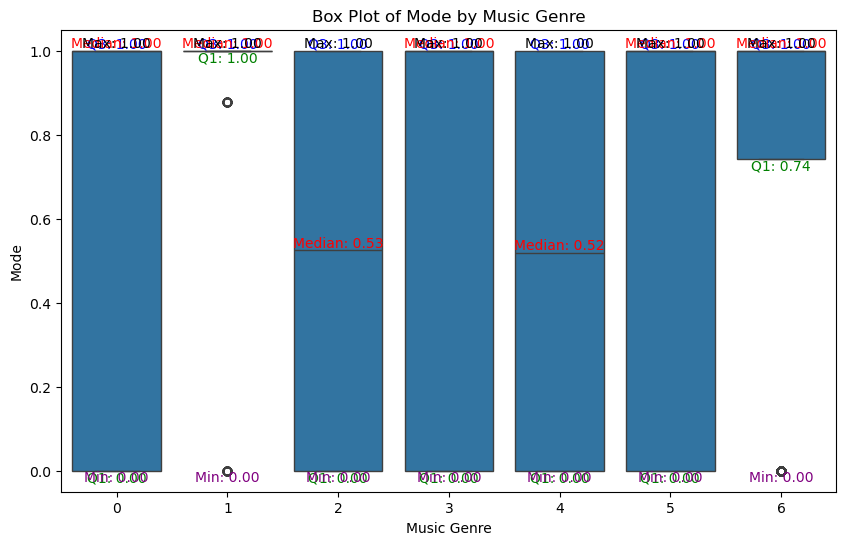

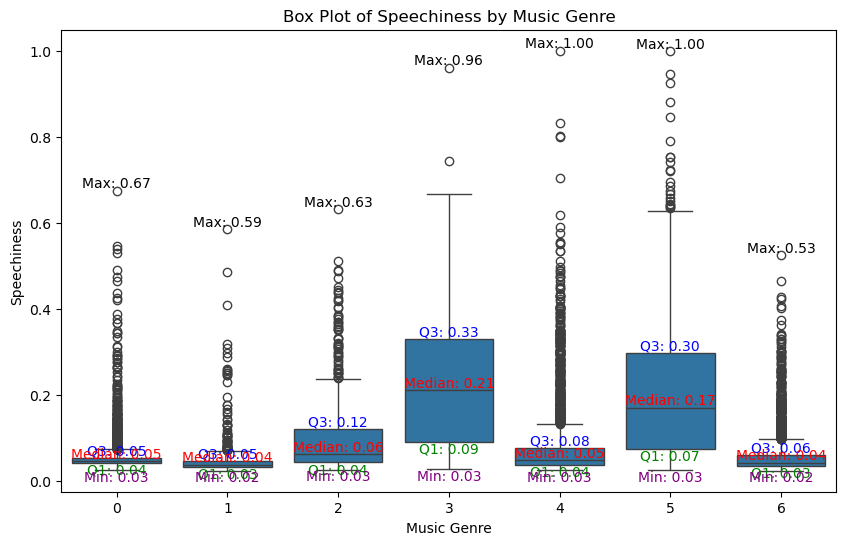

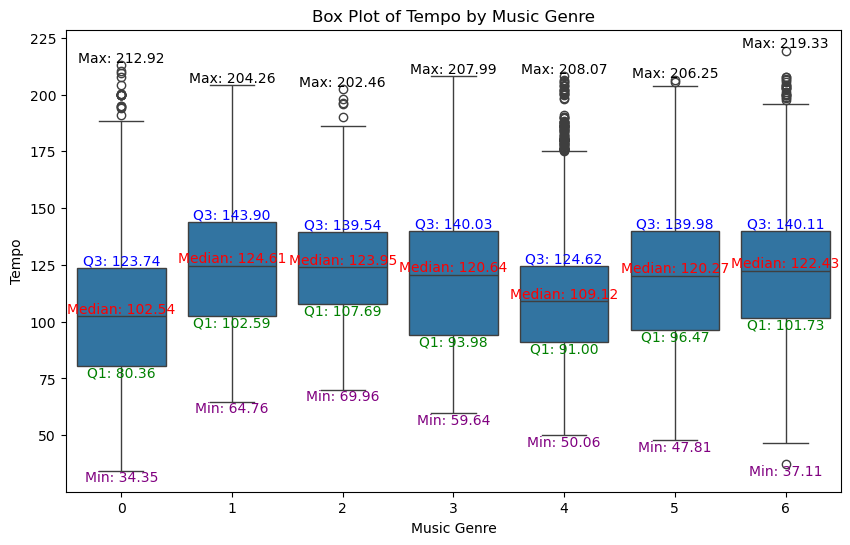

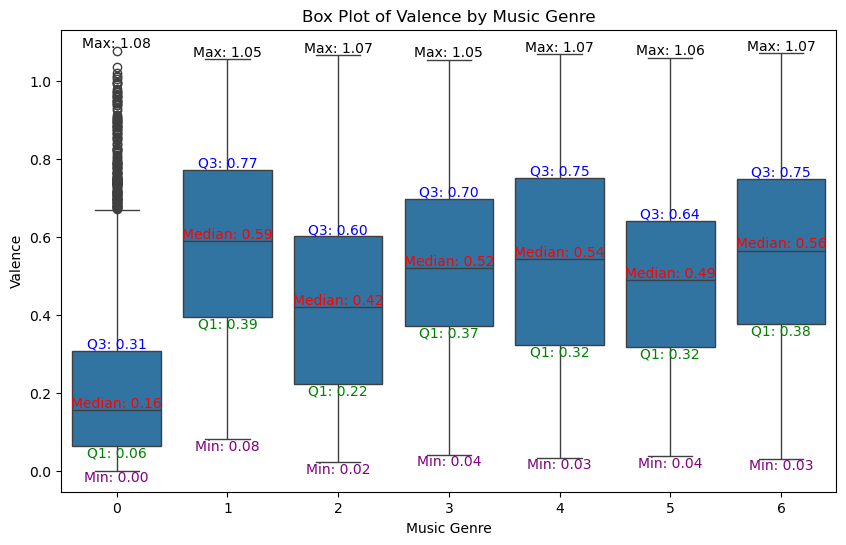

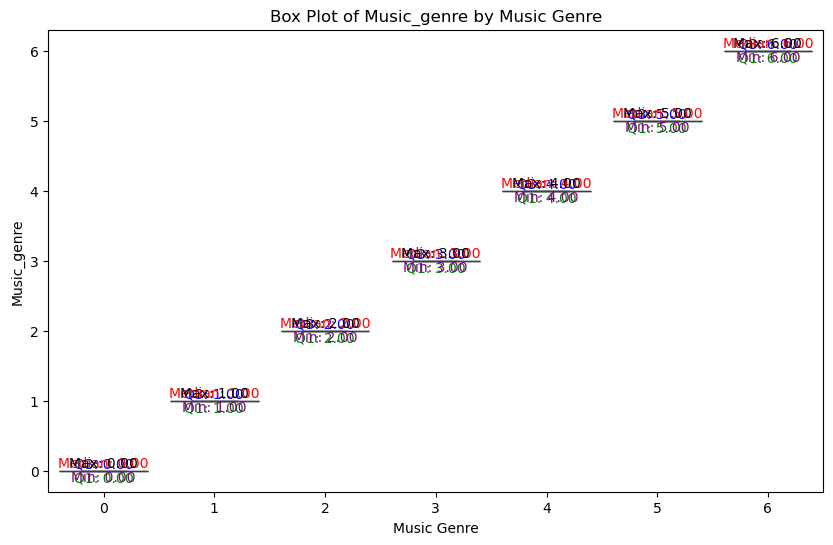

KeyError: '75%'

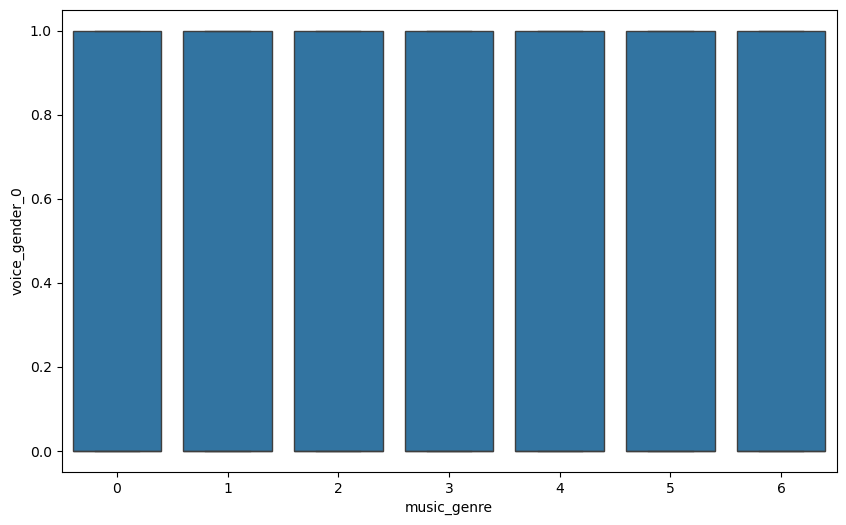

In [13]:
target = df["music_genre"]
for feature in df.columns[:-1]: 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='music_genre', y=feature, data=df)
    desc_stats = df.groupby('music_genre')[feature].describe()
    for i, stat in enumerate(desc_stats.index):
        plt.text(i, desc_stats.loc[stat, '75%'], f"Q3: {desc_stats.loc[stat, '75%']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='blue')
        plt.text(i, desc_stats.loc[stat, '50%'], f"Median: {desc_stats.loc[stat, '50%']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='red')
        plt.text(i, desc_stats.loc[stat, '25%'], f"Q1: {desc_stats.loc[stat, '25%']:.2f}", horizontalalignment='center', verticalalignment='top', color='green')
        plt.text(i, desc_stats.loc[stat, 'max'], f"Max: {desc_stats.loc[stat, 'max']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='black')
        plt.text(i, desc_stats.loc[stat, 'min'], f"Min: {desc_stats.loc[stat, 'min']:.2f}", horizontalalignment='center', verticalalignment='top', color='purple')
    plt.title(f"Box Plot of {feature.capitalize()} by Music Genre")
    plt.xlabel("Music Genre")
    plt.ylabel(feature.capitalize())

    plt.show()


In [13]:
# df


# corr = df.corr()

# plt.subplots(figsize=(10,10))
# sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='RdBu', annot=True)
# plt.title("Correlation Coefficient Heatmap of DataFrame")

In [10]:
def outlier_cap(column_name):
    lower_limit = df[column_name].quantile(0.1)
    upper_limit = df[column_name].quantile(0.9)

    print(df[column_name].clip(lower=lower_limit, upper=upper_limit, inplace=True))

In [15]:
print(df.shape)

(13620, 32)


In [11]:
outlier_cap("valence")
outlier_cap("tempo")
outlier_cap("speechiness")
outlier_cap("loudness")
outlier_cap("liveness")
outlier_cap("instrumentalness")
outlier_cap("energy")
outlier_cap("duration_ms")
outlier_cap("danceability")
outlier_cap("acousticness")
outlier_cap("popularity")

None
None
None
None
None
None
None
None
None
None
None


C:\Users\jackh\AppData\Local\Temp\ipykernel_1148\2041271342.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(df[column_name].clip(lower=lower_limit, upper=upper_limit, inplace=True))
C:\Users\jackh\AppData\Local\Temp\ipykernel_1148\2041271342.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [17]:
df["energy"].isnull().sum()

0

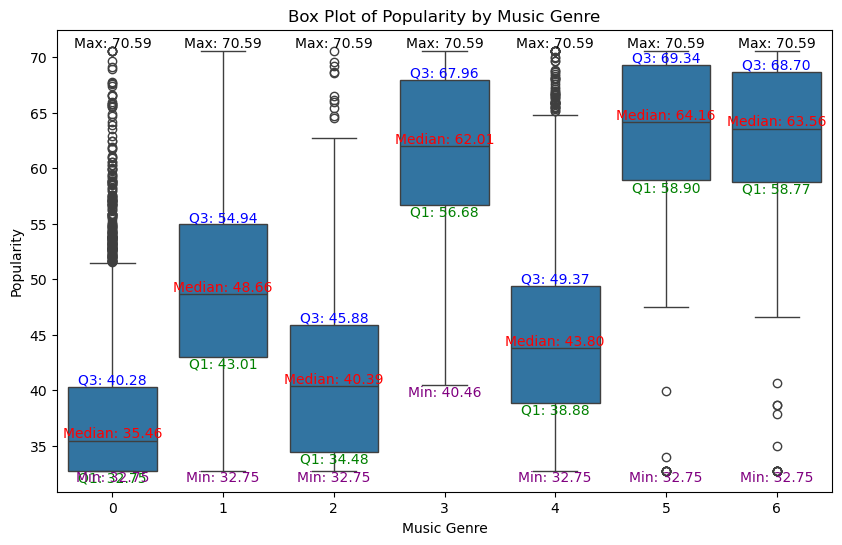

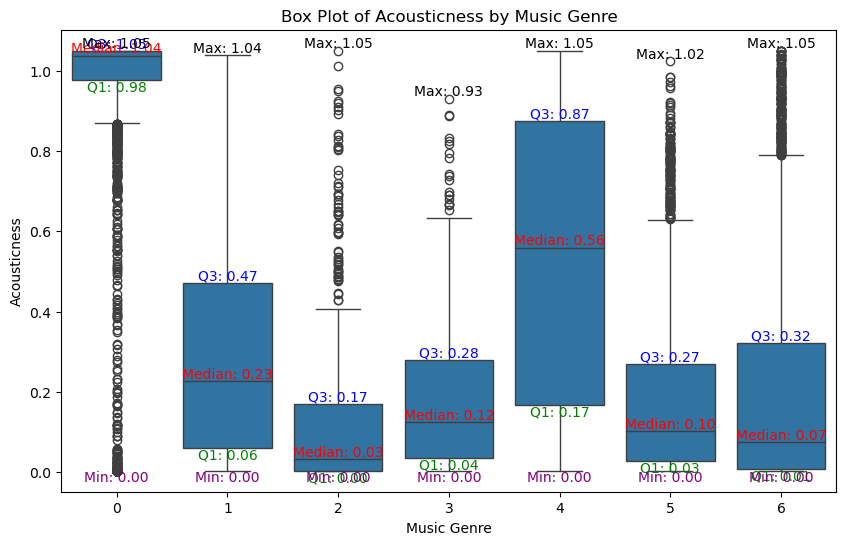

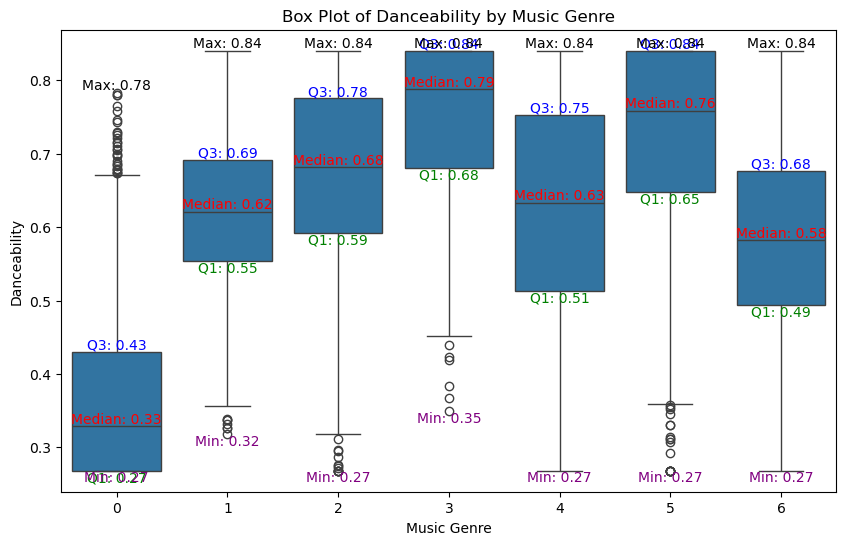

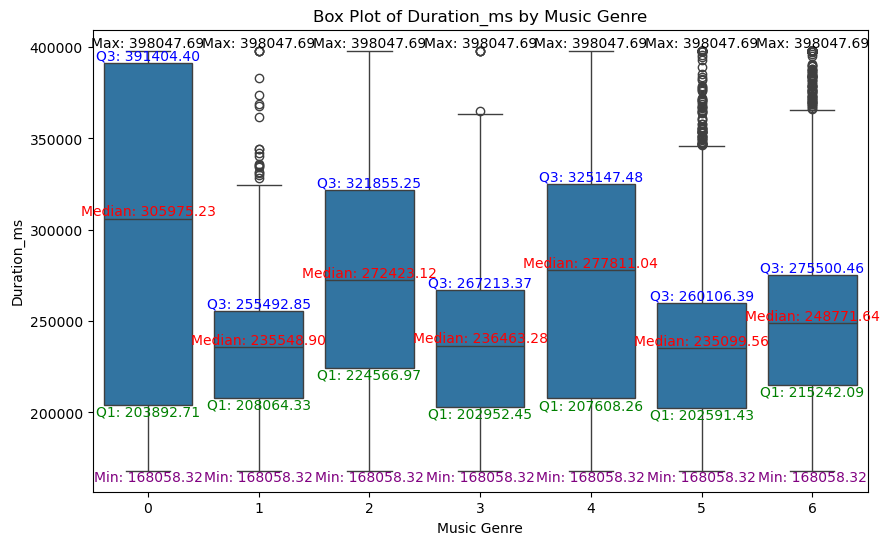

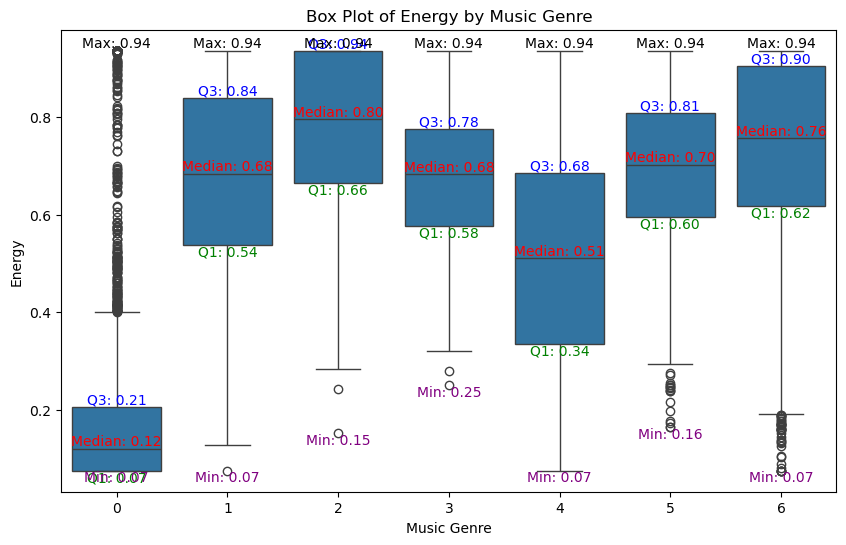

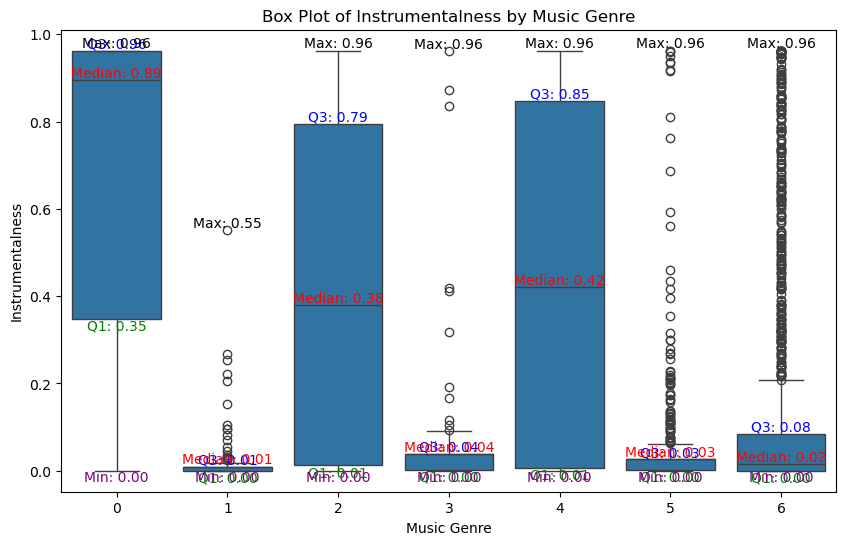

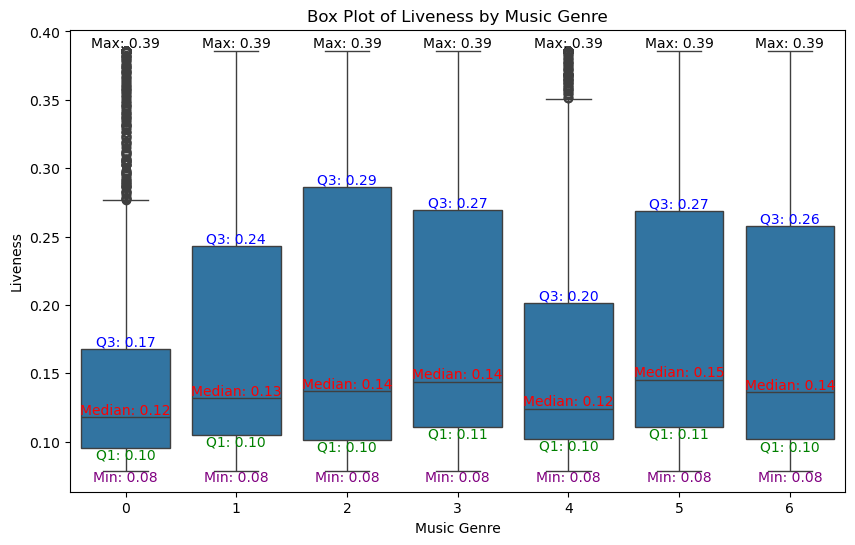

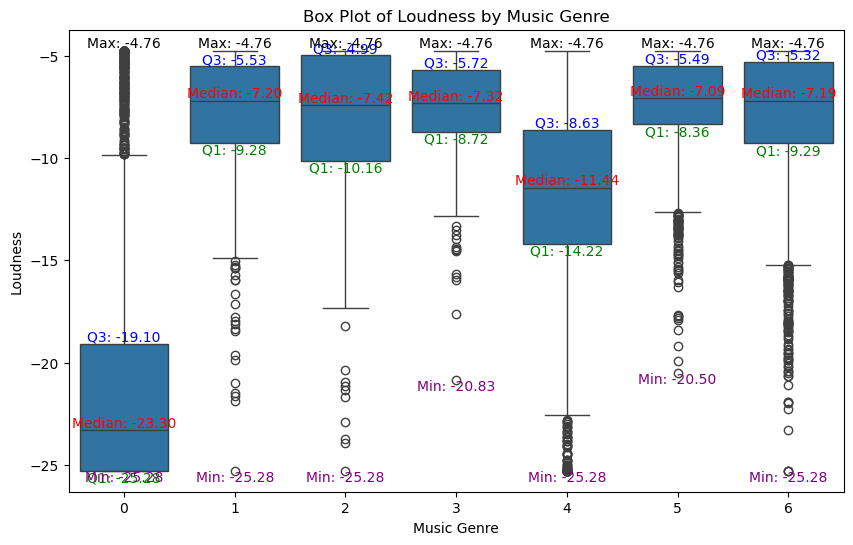

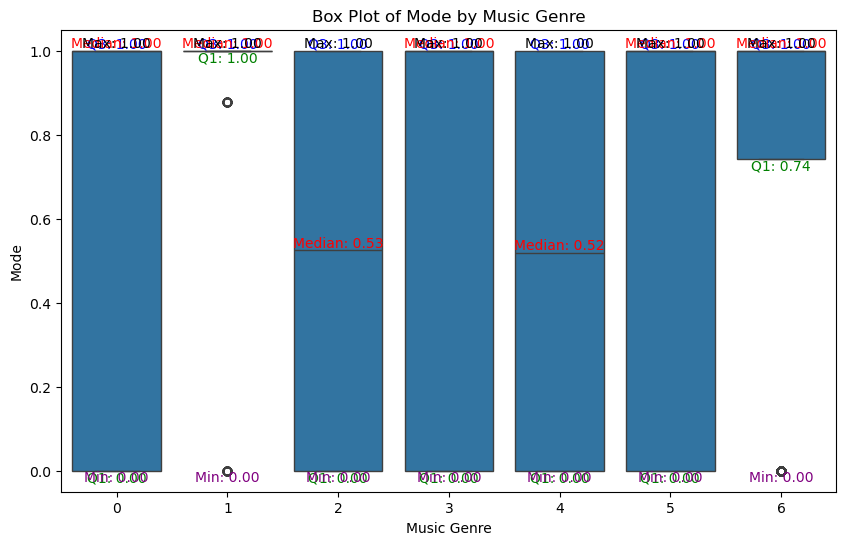

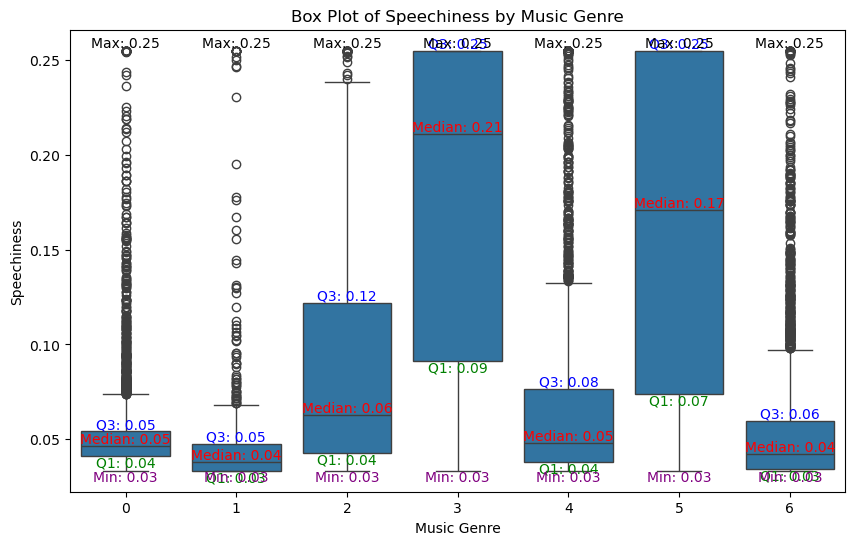

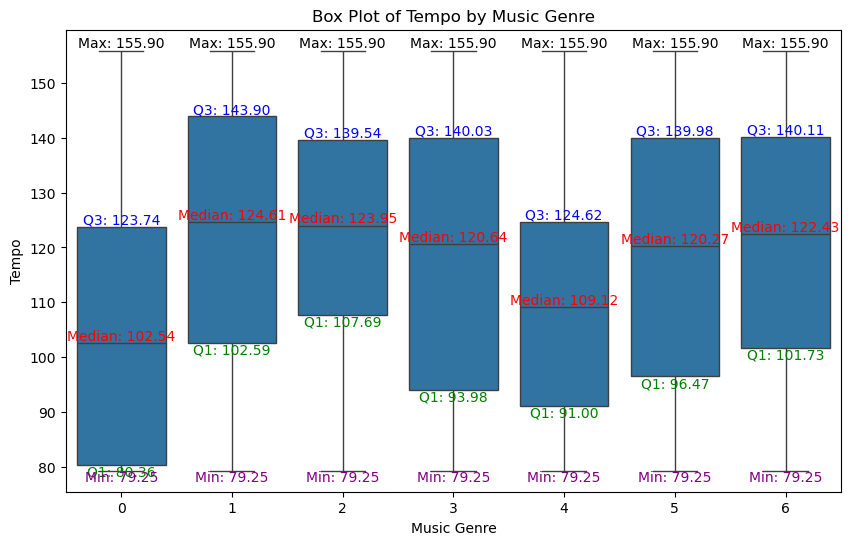

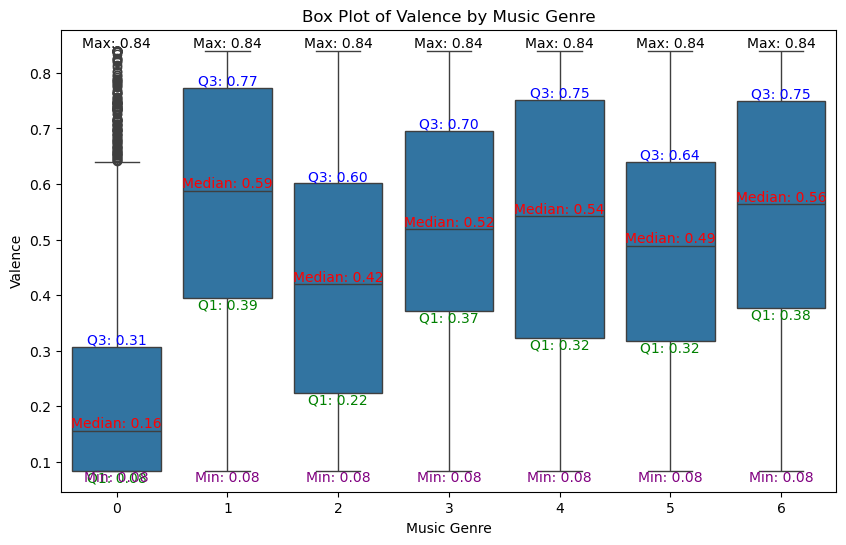

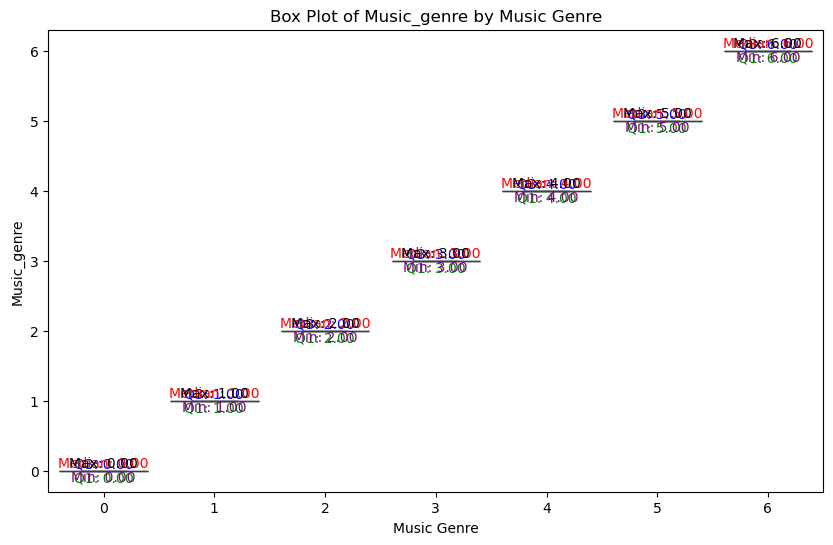

KeyError: '75%'

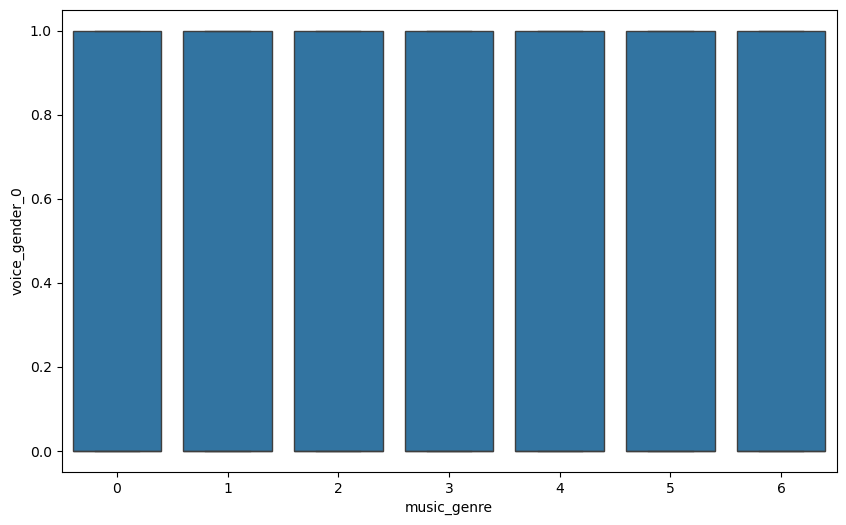

In [ ]:
target = df["music_genre"]
for feature in df.columns[:-1]: 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='music_genre', y=feature, data=df)
    desc_stats = df.groupby('music_genre')[feature].describe()
    for i, stat in enumerate(desc_stats.index):
        plt.text(i, desc_stats.loc[stat, '75%'], f"Q3: {desc_stats.loc[stat, '75%']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='blue')
        plt.text(i, desc_stats.loc[stat, '50%'], f"Median: {desc_stats.loc[stat, '50%']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='red')
        plt.text(i, desc_stats.loc[stat, '25%'], f"Q1: {desc_stats.loc[stat, '25%']:.2f}", horizontalalignment='center', verticalalignment='top', color='green')
        plt.text(i, desc_stats.loc[stat, 'max'], f"Max: {desc_stats.loc[stat, 'max']:.2f}", horizontalalignment='center', verticalalignment='bottom', color='black')
        plt.text(i, desc_stats.loc[stat, 'min'], f"Min: {desc_stats.loc[stat, 'min']:.2f}", horizontalalignment='center', verticalalignment='top', color='purple')
    plt.title(f"Box Plot of {feature.capitalize()} by Music Genre")
    plt.xlabel("Music Genre")
    plt.ylabel(feature.capitalize())

    plt.show()

# MODELING TIME


# Train Test split:













In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()



y=df['music_genre']
X=df.drop(columns=['music_genre'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)






# Feature selection using random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from scipy.stats import chisquare

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
accuracy_before = rf.score(X_test, y_test)
print(f'Acc before selection: {accuracy_before:.4f}')

Acc before selection: 0.8510


In [14]:
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [15]:
# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:8].values
X_Selected = df[top_features]

y_selected=df['music_genre']


X2_train, X2_test, y2_train, y2_test = train_test_split(X_Selected, y_selected, test_size = 0.2, random_state = 0,stratify=y_selected)
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [16]:
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X2_train, y2_train)
accuracy_after = rf_selected.score(X2_test, y2_test)
print(f'Acc after selection: {accuracy_after:.4f}')

Acc after selection: 0.8399


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, f1_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print("MAE:", round(mae_rf,2))
print("MSE:", round(mse_rf,2))
print("MAPE:", round(mape_rf,4))
print("F1 score: ", round(f1_rf*100, 4))

MAE: 0.38
MSE: 1.26
MAPE: 231462535914783.34
F1 score:  84.4354


# Gradient Boosting:

In [18]:
# Train and Evaluate Gradient Boosting Machine (GBM) Model
gbm = GradientBoostingClassifier(n_estimators=250, random_state=42, learning_rate=.25)
gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test)

# Evaluate GBM
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mape_gbm = mean_absolute_percentage_error(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm, average="weighted")

print("MAE:", round(mae_gbm,2))
print("MSE:", round(mse_gbm,2))
print("MAPE:", round(mape_gbm,2))
print("F1 Score: " , f1_gbm*100)

MAE: 0.26
MSE: 0.85
MAPE: 178556813419975.7
F1 Score:  89.54535675831569


# Gradient Boosting with feature selection

In [26]:
# Train and Evaluate Gradient Boosting Machine (GBM) Model
gbm_selected = GradientBoostingClassifier(n_estimators=250, random_state=42, learning_rate=.25)
gbm_selected.fit(X2_train, y2_train)

# Make predictions
y2_pred_gbm = gbm_selected.predict(X2_test)

# Evaluate GBM
mae_gbm_selected = mean_absolute_error(y2_test, y2_pred_gbm)
mse_gbm_selected = mean_squared_error(y2_test, y2_pred_gbm)
mape_gbm_selected = mean_absolute_percentage_error(y2_test, y2_pred_gbm)
f1_gbm_selected = f1_score(y2_test, y2_pred_gbm, average="weighted")

print("MAE:", round(mae_gbm_selected,2))
print("MSE:", round(mse_gbm_selected,2))
print("MAPE:", round(mape_gbm_selected,2))
print("F1 Score: " , f1_gbm_selected*100)

MAE: 0.34
MSE: 1.07
MAPE: 297594689033292.75
F1 Score:  86.21181913263706


# HyperParameter Tuning for Gradient Boosting Machine:

In [ ]:
# Step 3: Perform Grid Search for GBM
param_grid_gbm = {
    'n_estimators': [250, 300],
    'learning_rate': [.25, .3],
    # 'max_depth': [3, 5, 7],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

gbm = GradientBoostingClassifier(random_state=42)
grid_search_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='f1_weighted', n_jobs=4)
grid_search_gbm.fit(X_train, y_train)

# Step 4: Extract Best Parameters
best_params_gbm = grid_search_gbm.best_params_
print("Best Parameters for GBM:", best_params_gbm)

# Step 5: Manually Place Best Parameters in GBM Model
best_gbm_manual = GradientBoostingClassifier(
    n_estimators=best_params_gbm['n_estimators'],
    learning_rate=best_params_gbm['learning_rate'],
    # max_depth=best_params_gbm['max_depth'],
    # min_samples_split=best_params_gbm['min_samples_split'],
    # min_samples_leaf=best_params_gbm['min_samples_leaf'],
    random_state=42
)

# Train the model with the best parameters
best_gbm_manual.fit(X_train, y_train)

# Make predictions
y_pred_gbm_manual = best_gbm_manual.predict(X_test)

# Evaluate the model
mae_gbm_manual = mean_absolute_error(y_test, y_pred_gbm_manual)
mse_gbm_manual = mean_squared_error(y_test, y_pred_gbm_manual)
mape_gbm_manual = mean_absolute_percentage_error(y_test, y_pred_gbm_manual)
f1_gbm_manual = f1_score(y_test, y_pred_gbm_manual, average="weighted")

print("MAE:", mae_gbm_manual)
print("MSE:", mse_gbm_manual)
print("MAPE:", mape_gbm_manual)
print("F1 Score: " , f1_gbm_manual*100)

KeyboardInterrupt: 

# XG Boost

In [27]:
import xgboost as xgb

xgbm = xgb.XGBClassifier(tree_method="hist", multi_strategy="multi_output_tree")
xgbm.fit(X_train, y_train)

y_pred_xgb_manual = xgbm.predict(X_test)

# Evaluate the model
mae_xgb_manual = mean_absolute_error(y_test, y_pred_xgb_manual)
mse_xgb_manual = mean_squared_error(y_test, y_pred_xgb_manual)
mape_xgb_manual = mean_absolute_percentage_error(y_test, y_pred_xgb_manual)
f1_xgb_manual = f1_score(y_test, y_pred_xgb_manual, average="weighted")

print("MAE:", mae_xgb_manual)
print("MSE:", mse_xgb_manual)
print("MAPE:", mape_xgb_manual)
print("F1 Score: " , f1_xgb_manual*100)

MAE: 0.3370044052863436
MSE: 1.1167400881057268
MAPE: 262875308646075.3
F1 Score:  86.72559526985471


# Support Vector Machine

In [28]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC


param_grid_svm = {
    'gamma': [.01, .001],
    'C': [.00005, .0001,]
}

svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_weighted', n_jobs=4)
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
print("Best Parameters for SVC:", best_params_svm)

# Step 5: Manually Place Best Parameters in svc Model
best_svc_manual = SVC(
    gamma=best_params_svm['gamma'],
    C=best_params_svm['C']
)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average="weighted")

print("MAE:", mae_svm)
print("MSE:", mse_svm)
print("MAPE:", mape_svm)
print("F1 Score: " , f1_svm*100)

Best Parameters for SVC: {'C': 5e-05, 'gamma': 0.01}
MAE: 0.5554331864904553
MSE: 1.764684287812041
MAPE: 391833007227168.9
F1 Score:  74.87251830202007


# Voting

In [ ]:
import warnings
from sklearn import model_selection
warnings.filterwarnings("ignore")

svm, xgbm, gbm

labels = ['svm', 'xgbm', 'gbm']

for clf, label in zip([svm, xgbm, gbm], labels):
 
    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='f1_weighted')
     
    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.4f (+/- %0.4f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.2767 (+/- 0.0040) [svm]
Accuracy: 0.8731 (+/- 0.0026) [xgbm]
Accuracy: 0.8895 (+/- 0.0027) [gbm]


In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf_hard = VotingClassifier(
    estimators=[
        (labels[0], svm),
        (labels[1], xgbm),
        (labels[2], gbm),
    ],
    voting='hard'  # Specify hard voting, where the majority class prediction is chosen
)

voting_clf_soft = VotingClassifier(
    estimators=[
        (labels[0], svm),  # Include the first classifier (Logistic Regression)
        (labels[1], xgbm),  # Include the second classifier (Random Forest)
        (labels[2], gbm),  # Include the third classifier (Naive Bayes)
    ],
    voting='soft'  # Specify soft voting, where class probabilities are combined
)

labels_new = ['svm', 'xgbm', 'gbm', 'Voting_Classifier_Hard', 'Voting_Classifier_Soft']
 
# Loop through the classifiers and perform 5-fold cross-validation for each
for clf, label in zip([svm, xgbm, gbm, voting_clf_hard, voting_clf_soft], labels_new):
 
    # Use cross_val_score to compute accuracy scores using 5-fold cross-validation
    scores = model_selection.cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
     
    # Print the mean accuracy and standard deviation of accuracy for the current classifier
    print("Accuracy: %0.4f (+/- %0.4f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.2767 (+/- 0.0040) [svm]
Accuracy: 0.8731 (+/- 0.0026) [xgbm]
Accuracy: 0.8895 (+/- 0.0027) [gbm]
Accuracy: 0.8778 (+/- 0.0017) [Voting_Classifier_Hard]
Accuracy: nan (+/- nan) [Voting_Classifier_Soft]
